# Projet Data Science - Simulateur de DPE
## ENSAE Paris - 2A

Membres du groupe : 
- Wiam LACHQER , Amine RAZIG , Julien BOUDIER

Ce projet Python a été créé dans le but de fournir des visualisations variées des données et de mettre en place un simulateur de Diagnostic de Performance Energétique (DPE) à partir de la base de données de l'ADEME (Agence de la Transition Écologique).

## Objectifs du Projet

1. **Visualisations de Données :** Le projet propose différentes visualisations des données issues de la base de l'ADEME. Ces visualisations permettent une compréhension approfondie des caractéristiques énergétiques des logements.

2. **Simulateur de DPE :** Un simulateur de DPE a été développé en utilisant les données de l'ADEME. Ce simulateur permet d'estimer la performance énergétique d'un logement en fonction de divers paramètres.

In [14]:
# Importation des bibliothèques qu’on va utiliser
import fetchdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Importation des données :

In [15]:
# Import des données à partir de L'API : 

chosen_variables=['N°DPE',
                  'Etiquette_GES',
                  'Etiquette_DPE',
                  'Année_construction',
                  'Type_bâtiment',
                  'Période_construction',
                  'Hauteur_sous-plafond',
                  'Surface_habitable_logement',
                  'Classe_altitude',
                  'Zone_climatique_',
                  'Nom__commune_(BAN)',
                  'N°_département_(BAN)',
                  'Coordonnée_cartographique_X_(BAN)',     
                  'Coordonnée_cartographique_Y_(BAN)',
                  'N°_région_(BAN)',
                  'Conso_5_usages_é_finale',
                  'Conso_5_usages/m²_é_finale',
                  'Conso_chauffage_é_finale',
                  'Emission_GES_5_usages',
                  'Emission_GES_5_usages_par_m²',
                  'Conso_5_usages_é_finale_énergie_n°1',
                  'Coût_total_5_usages_énergie_n°1',
                  'Conso_5_usages_é_finale_énergie_n°2',
                  'Coût_total_5_usages_énergie_n°2',
                  'Conso_5_usages_é_finale_énergie_n°3',
                  'Coût_total_5_usages_énergie_n°3',
                  'Coût_total_5_usages',
                  'Qualité_isolation_enveloppe',
                  'Qualité_isolation_menuiseries',
                  'Qualité_isolation_murs',
                  'Qualité_isolation_plancher_bas',
                  'Type_énergie_principale_chauffage',
                  'Type_énergie_principale_ECS',
                  'Type_énergie_n°1',
                  'Type_installation_ECS',
                  'Type_installation_solaire',
                  'Surface_climatisée',               
                  'Type_ventilation']
df_DPE = fetchdata.get_dpe(chosen_variables, size =20000)
df_DPE.head(3)



Fetched 10000 observations
Fetched 20000 observations


Coût_total_5_usages_énergie_n°3            Type_énergie_n°1  \
0                            160.9  Réseau de Chauffage urbain   
1                              NaN                 Électricité   
2                              NaN                 Électricité   

   Coût_total_5_usages_énergie_n°2     Nom__commune_(BAN)  \
0                            286.6         Saint-Herblain   
1                           2337.8         Bourg-la-Reine   
2                            211.1  Saint-Romain-en-Jarez   

   Coût_total_5_usages_énergie_n°1 Qualité_isolation_enveloppe  \
0                            368.9                insuffisante   
1                           2337.8                insuffisante   
2                           1950.3                       bonne   

   Coût_total_5_usages  Emission_GES_5_usages          N°DPE  \
0                702.1                 1027.7  2144E0974339H   
1               2337.8                 3672.5  2192E1018146A   
2               2161.4                 1086.8  2342E0053692U   

  Qualité_isolation_menuiseries  ... Période_construction _score  \
0                       moyenne  ...            1975-1977   None   
1                       moyenne  ...            1983-1988   None   
2                       moyenne  ...            1983-1988   None   

       Type_installation_ECS  Zone_climatique_   Classe_altitude  \
0                        NaN               NaN               NaN   
1    installation collective               H1a  inférieur à 400m   
2  installation individuelle               H1c          400-800m   

   Type_énergie_principale_ECS  Type_énergie_principale_chauffage  \
0                          NaN                                NaN   
1   Réseau de Chauffage urbain                        Électricité   
2                  Électricité                        Électricité   

                      Type_ventilation Type_installation_solaire  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2  VMC SF Auto réglable de 2001 à 2012                       NaN   

   Surface_climatisée  
0                 NaN  
1                 NaN  
2                 NaN  

[3 rows x 39 columns]

In [46]:
# IMPORTATION DE LA LISTE DES VARIABLES DISPONIBLES SUR L'API : 

liste_variables = pd.read_excel('DATA/DPE_data_descrption.xlsx')
liste_variables.head(3)

Catégorie                     Nom_champ  \
0  Administratif  Appartement_non_visité_(0/1)   
1  Administratif        Date_établissement_DPE   
2  Administratif         Date_fin_validité_DPE   

                                         Description  \
0  est ce que l'appartement est un appartement no...   
1                     date de l'établissement du dpe   
2                     Date de fin de validité du DPE   

  OPEN DATA LOGEMENT EXISTANT OPEN DATA LOGEMENT NEUF OPEN DATA TERTIAIRE  
0                           X                       X                 NaN  
1                           X                       X                   X  
2                           X                       X                   X

## Mise en place de la base de données exploitable. 
L'objectif est de selectionner et de modifier certaines variables afin qu'elles puissent etre utilisées efficacement dans nos analyses.

### Traitement des valeurs manquantes : 

In [17]:
import eda
# we use the function in the file explo data

eda.create_unique(df_DPE).head(5)

Column_name Data_type Number_of_unique  \
0  Coût_total_5_usages_énergie_n°3   float64             2178   
1                 Type_énergie_n°1    object               12   
2  Coût_total_5_usages_énergie_n°2   float64             8876   
3               Nom__commune_(BAN)    object             5470   
4  Coût_total_5_usages_énergie_n°1   float64            11395   

  Number_of_missing  Percentage_of_missing  \
0             17271                0.86355   
1                 0                0.00000   
2              3631                0.18155   
3               129                0.00645   
4                 0                0.00000   

                                       Unique_values  
0                         More than 15 unique values  
1  [Réseau de Chauffage urbain, Électricité, Fiou...  
2                         More than 15 unique values  
3                         More than 15 unique values  
4                         More than 15 unique values

In [18]:
#-------------------------------------------------------------------------------------------------------
## Traitement spécifique 
#-------------------------------------------------------------------------------------------------------

# Suppression des lignes dans lesquelles la surface habitable est non renseignée
df_DPE=df_DPE[df_DPE["Surface_habitable_logement"].notna()]
df_DPE=df_DPE[df_DPE["Qualité_isolation_plancher_bas"].notna()]

# Pour les données qui ont Type_énergie_principale_ECS=Nan ou Type_énergie_principale_chauffage=Nan, on remplit ces cases par Type_énergie_n°1
df_DPE["Type_énergie_principale_ECS"].fillna(df_DPE["Type_énergie_n°1"], inplace = True)
df_DPE["Type_énergie_principale_chauffage"].fillna(df_DPE["Type_énergie_n°1"], inplace = True)

# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_chauffage' par 'bois'
df_DPE['Type_énergie_principale_chauffage'] = df_DPE['Type_énergie_principale_chauffage'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')
# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_ECS' par 'bois'
df_DPE['Type_énergie_principale_ECS'] = df_DPE['Type_énergie_principale_ECS'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')

# La simulation portera uniquement sur les maisons et les appartements, on supprime les immeubles
df_DPE=df_DPE[df_DPE["Type_bâtiment"]!="immeuble"]
df_DPE = pd.get_dummies(df_DPE, columns=['Type_bâtiment'])


In [19]:
import eda
#-------------------------------------------------------------------------------------------------------
## traitement général ( supp valeurs manquantes +60%, conversion variables en encoded)
#-------------------------------------------------------------------------------------------------------
df_DPE = eda.clean_na(df_DPE)
df_DPE = df_DPE.dropna() # on termine par suprimmer les lignes avec des valeusr manquantes 
# TODO statistiques sur les doublons retirés 
eda.create_unique(df_DPE).head(5)


The list of variables deleted is : ['Coût_total_5_usages_énergie_n°3', 'Conso_5_usages_é_finale_énergie_n°3', '_score', 'Type_installation_solaire', 'Surface_climatisée']


Column_name Data_type Number_of_unique  \
0                 Type_énergie_n°1    object               12   
1  Coût_total_5_usages_énergie_n°2   float64             3313   
2               Nom__commune_(BAN)    object             2096   
3  Coût_total_5_usages_énergie_n°1   float64             5519   
4      Qualité_isolation_enveloppe    object                4   

  Number_of_missing  Percentage_of_missing  \
0                 0                    0.0   
1                 0                    0.0   
2                 0                    0.0   
3                 0                    0.0   
4                 0                    0.0   

                                       Unique_values  
0  [Réseau de Chauffage urbain, Gaz naturel, Élec...  
1                         More than 15 unique values  
2                         More than 15 unique values  
3                         More than 15 unique values  
4         [insuffisante, moyenne, bonne, très bonne]

## Analyse descriptive de la base de donnée : 
- Consommation et émissions 
- Répartition des types d'énergies principaux des logements
- Type de chauffage utilisé en majorité ? 





### Comment se comportent nos variables d'interets ( consommation & émissions ) ?

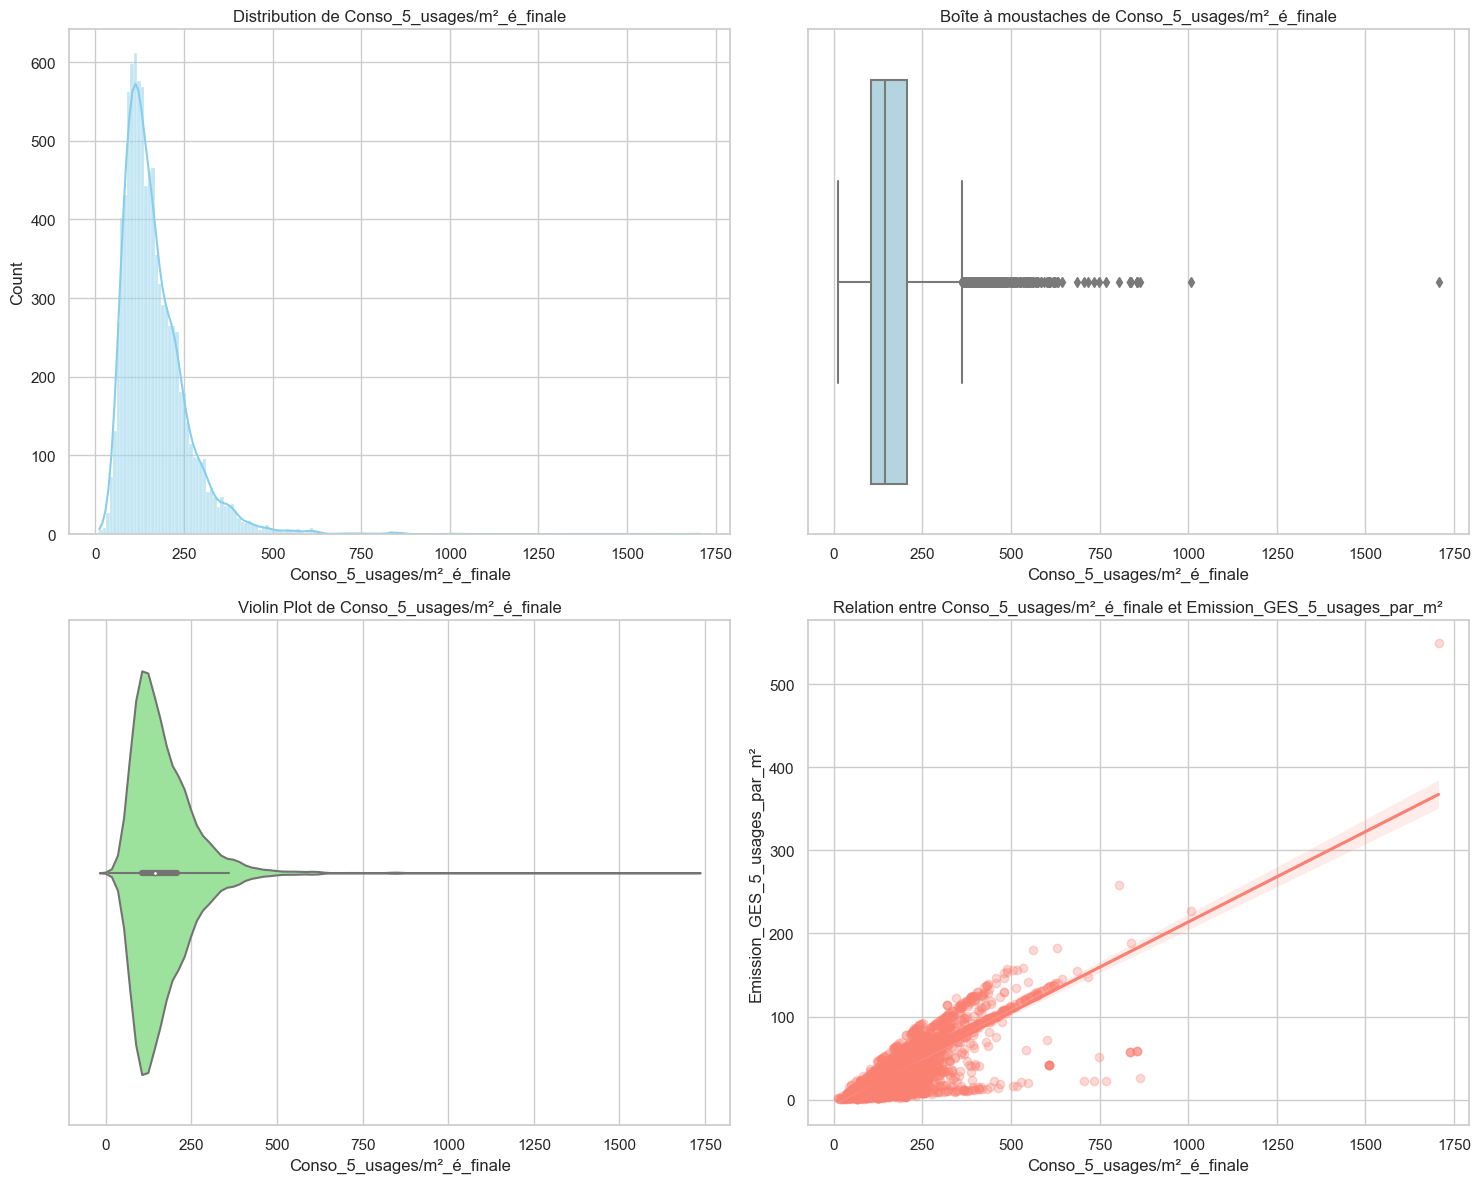

In [20]:
import eda 
eda.create_energy_plots(df_DPE, 'Conso_5_usages/m²_é_finale', 'Emission_GES_5_usages_par_m²')

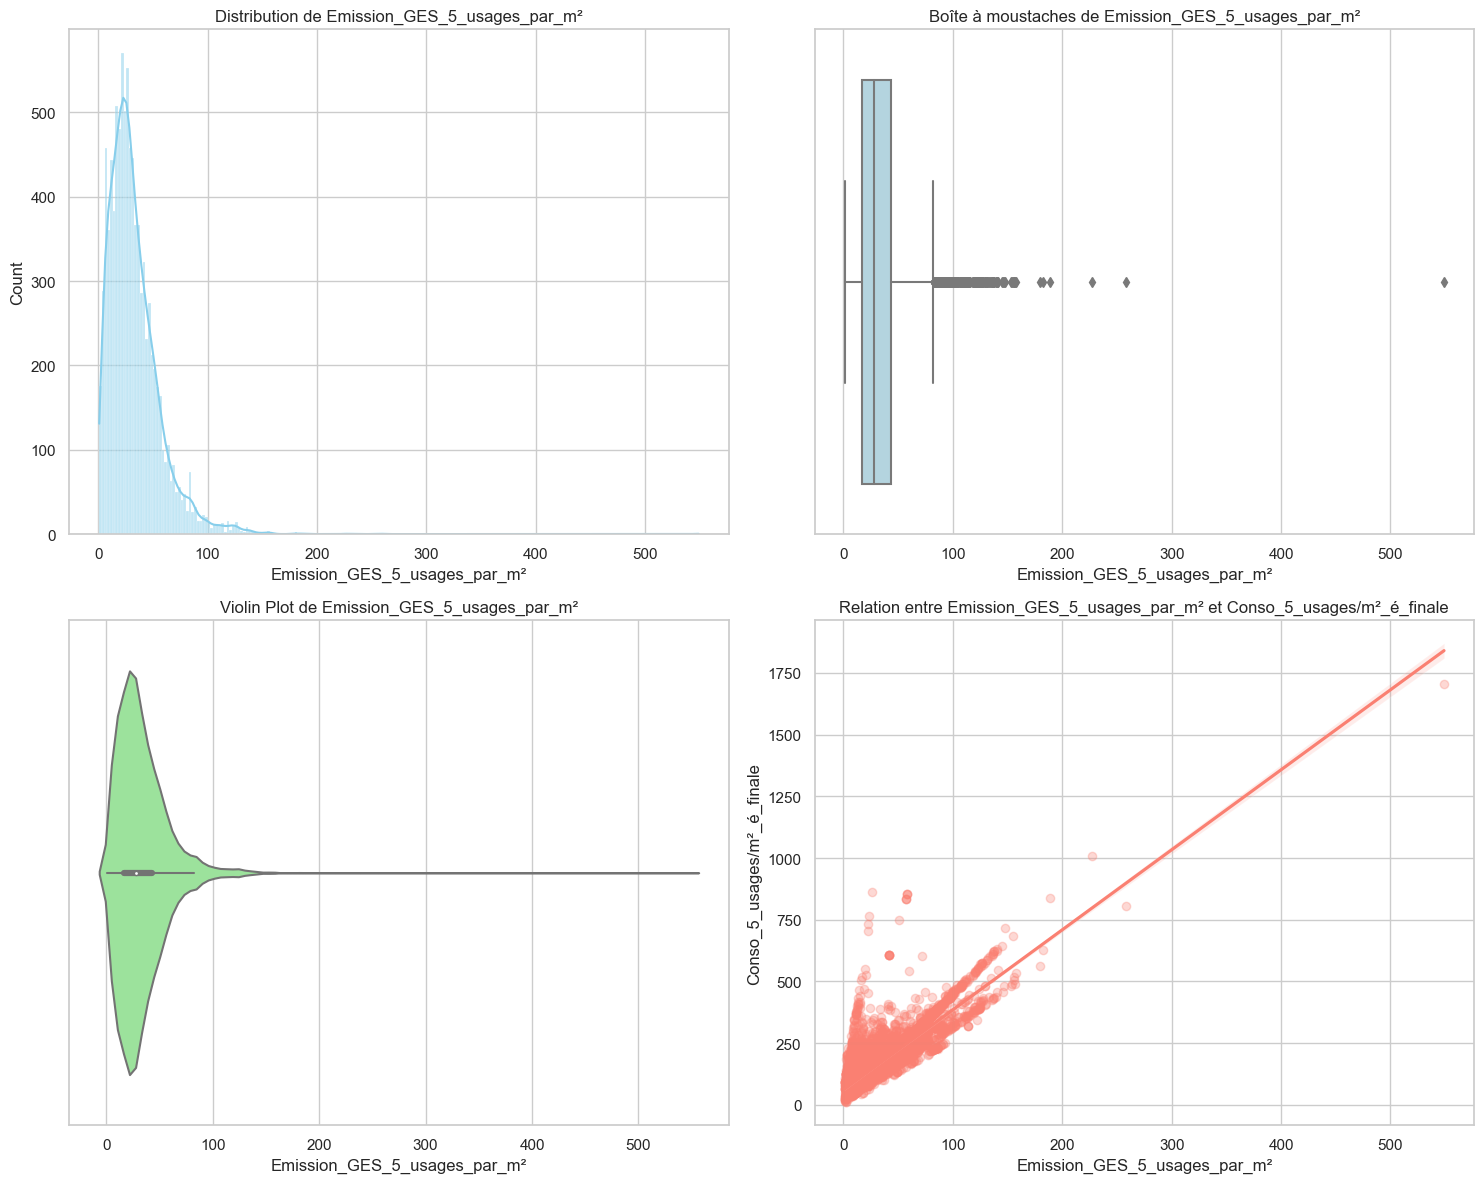

In [21]:
eda.create_energy_plots(df_DPE, 'Emission_GES_5_usages_par_m²', 'Conso_5_usages/m²_é_finale')

### Quels sont les types d'énergies utilisées en France ? 

In [22]:
# Analyse descriptive de la base de donnée - types d'énergies (interactif, s'affiche seulement apres le lancement du notebook ) : 

eda.pieplot_chauffage_interact(df_DPE)

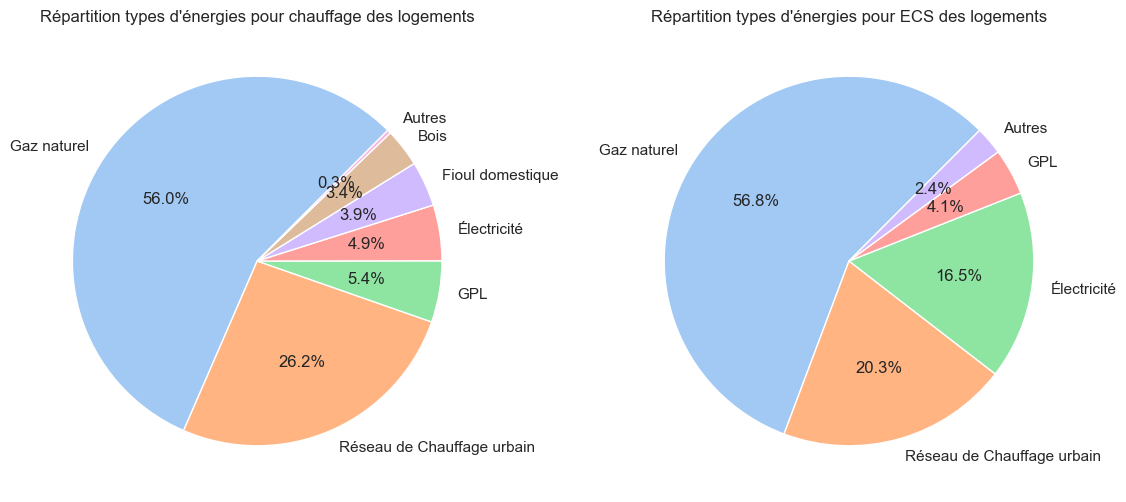

In [23]:
# Analyse descriptive de la base de donnée - types d'énergies : 
eda.pieplot_chauffage(df_DPE)

/Users/aminerazig/Desktop/ENSAE 2A/Projet-Python/eda.py:343: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/aminerazig/Desktop/ENSAE 2A/Projet-Python/eda.py:348: UserWarning:

FixedFormatter should only be used together with FixedLocator



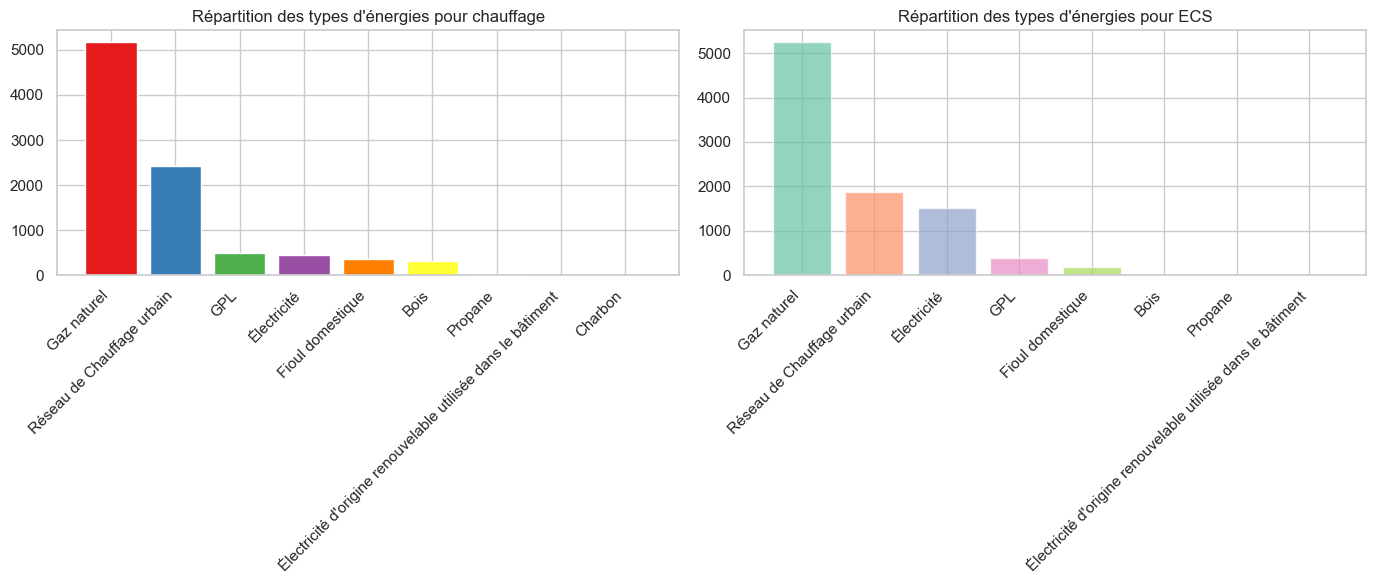

In [24]:
# barplot fixe types d'energies 
eda.barplot_chauffage(df_DPE)

In [25]:
# barplot interactif avec ploty : (interactif, s'affiche seulement apres le lancement du notebook )

eda.barplot_chauffage_inter(df_DPE)

## GEOLOCALISATION : 
Repésentation géographique des données à l'aide de géopandas 
Voici une liste non exhaustive des varaibles que nous utilisons pour cette partie : 

Variables à utiliser :
- Coordonnée_cartographique_X_(BAN)
- Coordonnée_cartographique_Y_(BAN)	
- Nom__commune_(BAN)
- N°_région_(BAN)
- Zone_climatique_
- Classe_altitude

Variables d'intérets : 
- Conso_5_usages_é_finale
- Etiquette_DPE	

La France compte 3 zones climatiques définies sur base des températures hivernales et estivales des régions qui les composent :
 
> La zone climatique **H1** est la zone la plus étendue. C’est là que sont relevées les températures les plus froides. L’hiver y est long. Les pluies sont fréquentes. Elle couvre toute la moitié nord-est de la France et descend jusqu’à Lyon ;

>La zone climatique **H2** correspond au reste de la France, de la zone nord-ouest à sud-ouest, à l’exception du bassin méditerranéen. Les températures y sont plus douces et l’hiver moins marqué. Les pluies peuvent être importantes tout au long de l’année ;

>La zone climatique **H3** constitue une bande sur le pourtour méditerranéen du sud-est de la France. C’est la zone avec les températures les plus chaudes et un hiver très doux. Les pluies y sont rares et brèves. Elle englobe également les DOM-TOM.
https://www.effy.fr/aide-energetique/zoom-sur-les-zones-climatiques-de-france

In [26]:
data = df_DPE.dropna()

In [27]:
data_filtre = df_DPE[(df_DPE['Coordonnée_cartographique_X_(BAN)'] >= 100000) &
                    (df_DPE['Coordonnée_cartographique_X_(BAN)'] <= 130000) &
                    (df_DPE['Coordonnée_cartographique_Y_(BAN)'] >= 6000000) &  
                    (df_DPE['Coordonnée_cartographique_Y_(BAN)'] <= 7200000)]

---------------------------------------
    => Etape 1 : Carte de la France complete 

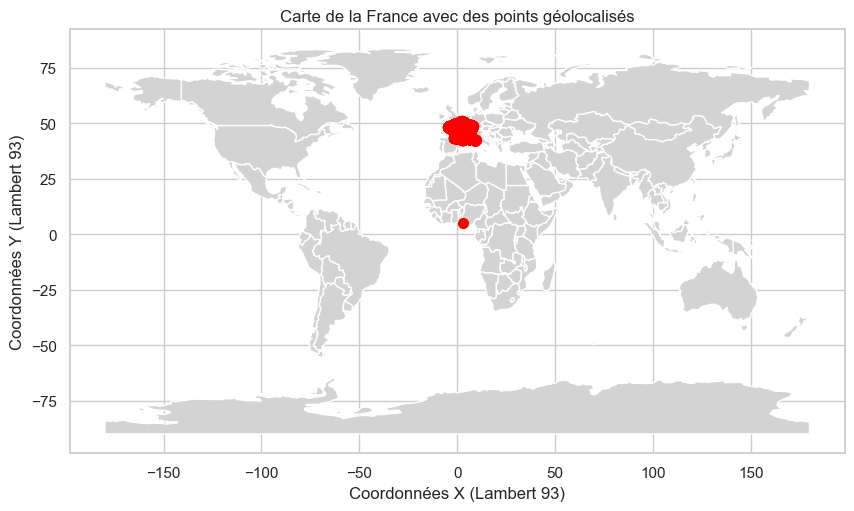

In [28]:

# Créer un GeoDataFrame avec les coordonnées Lambert 93
gdf_filtre = gpd.GeoDataFrame(df_DPE, geometry=gpd.points_from_xy(df_DPE['Coordonnée_cartographique_X_(BAN)'], df_DPE['Coordonnée_cartographique_Y_(BAN)']), crs='EPSG:2154')

# Filtrer les données en fonction des limites
#gdf_filtre= gdf_filtre.cx[bounds_france[0]:bounds_france[2], bounds_france[1]:bounds_france[3]]


# On commence part telecharger le fond de carte 
france = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#même référentiel spatial
gdf_filtre = gdf_filtre.to_crs(france.crs)


# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 8))
france.plot(ax=ax, color='lightgray')
gdf_filtre.plot(ax=ax, color='red', marker='o', markersize=50)
plt.title('Carte de la France avec des points géolocalisés')
plt.xlabel('Coordonnées X (Lambert 93)')
plt.ylabel('Coordonnées Y (Lambert 93)')
plt.show()

In [29]:
#on remarque qu'il y a un probleme de repésenation avec des logements aui ne sont pas sur le téritoires métropolitain -- points a supprimer
# exemple : 
''' Étiquette DPE: D
    Nom commune: Le Morne-Rouge
    Conso_5_usages/m²_é_finale: 214.8
    Coordonnée_cartographique_X_(BAN): 700503.45
    Coordonnée_cartographique_Y_(BAN): 1635446.01 '''

x_point_to_remove = 700503.45
y_point_to_remove = 1635446.01

data = data.drop(data[(data['Coordonnée_cartographique_X_(BAN)'] >= 100000) & (data['Coordonnée_cartographique_Y_(BAN)'] >= 1600000)].index)

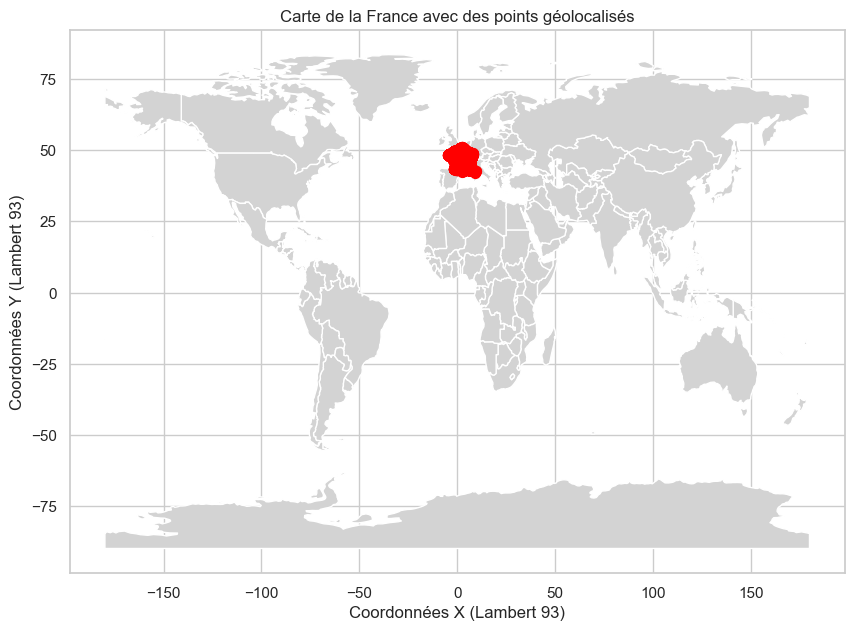

In [30]:

gdf = gpd.GeoDataFrame(df_DPE, geometry=gpd.points_from_xy(df_DPE['Coordonnée_cartographique_X_(BAN)'], df_DPE['Coordonnée_cartographique_Y_(BAN)']), crs='EPSG:2154')
x_point_to_remove = 700503.45
y_point_to_remove = 1635446.01
gdf = gdf.drop(gdf[(gdf['Coordonnée_cartographique_X_(BAN)'] == x_point_to_remove) & (gdf['Coordonnée_cartographique_Y_(BAN)'] == y_point_to_remove)].index)

# On commence part telecharger le fond de carte 
france = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#même référentiel spatial
gdf= gdf.to_crs(france.crs)


# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 8))
france.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, color='red', marker='o', markersize=50)
plt.title('Carte de la France avec des points géolocalisés')
plt.xlabel('Coordonnées X (Lambert 93)')
plt.ylabel('Coordonnées Y (Lambert 93)')
plt.show()

### Création d'une carte interactive au format HTML : 

In [50]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

#production de la carte interactive avec Folium au format HTML
ma_carte = folium.Map(location=[46.6, 2], zoom_start=6)

# Ajouter une couche GeoPandas à la carte en utilisant GeoJson
folium.GeoJson(gdf).add_to(ma_carte)

# Ajouter une couche GeoPandas pour la France
folium.GeoJson(france).add_to(ma_carte)

# Ajouter des marqueurs regroupés (Cluster) pour les points
marker_cluster = MarkerCluster().add_to(ma_carte)

for index, row in gdf.iterrows():
    #on creer le popup avec plusieurs champs
    popup_content = f"Étiquette DPE: {row['Etiquette_DPE']}<br>"
    popup_content += f"Nom commune: {row['Nom__commune_(BAN)']}<br>"
    popup_content += f"Conso_5_usages/m²_é_finale: {row['Conso_5_usages/m²_é_finale']}<br>"
    popup_content += f"Coordonnée_cartographique_X_(BAN): {row['Coordonnée_cartographique_X_(BAN)']}<br>"
    popup_content += f"Coordonnée_cartographique_Y_(BAN): {row['Coordonnée_cartographique_Y_(BAN)']}<br>"

    folium.Marker([row['geometry'].y, row['geometry'].x], popup= popup_content).add_to(marker_cluster)

# Enregistrer la carte interactive au format HTML
ma_carte.save('ma_carte_interactive.html')


### Création d'une carte interactive avec Folium :

In [ ]:
gdf.explore()

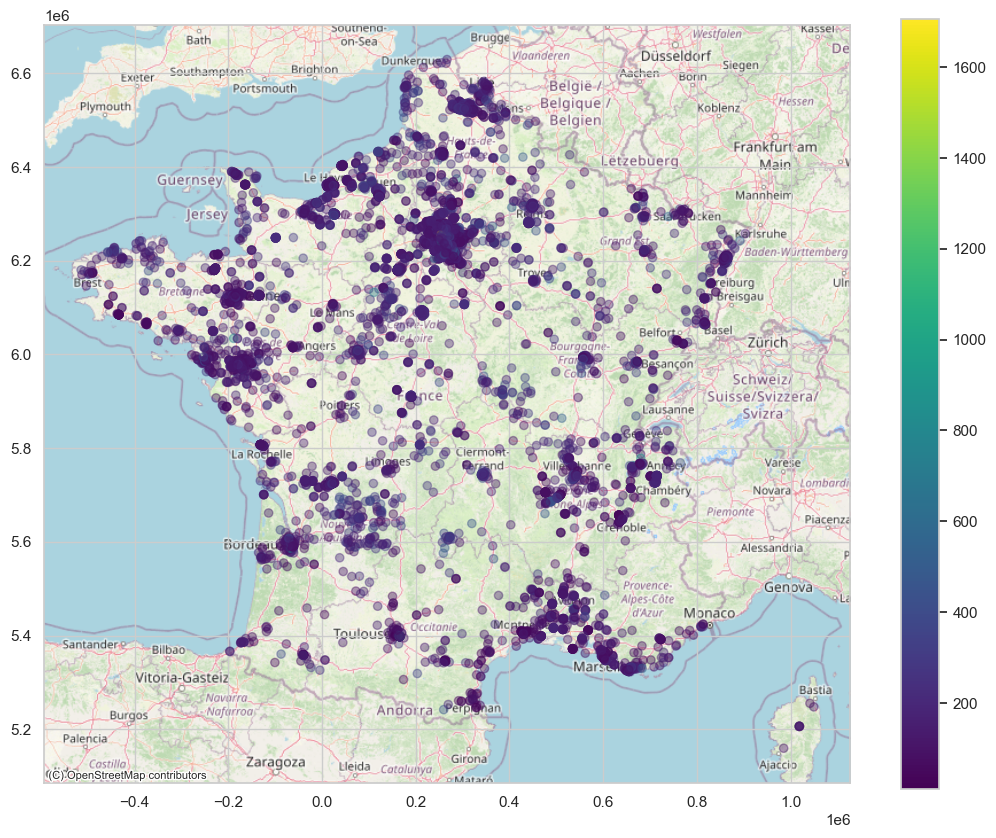

In [31]:
# Visulatisations rapides des données sur une carte de la france 
import contextily as ctx
# carte de la france avec legende en fonction d'une variable d'interet : 
fig,ax = plt.subplots(figsize=(13, 10))
gdf.to_crs(3857).plot(column ='Conso_5_usages/m²_é_finale',cmap='viridis',ax=ax ,alpha = 0.4, zorder=2, legend = True)

#shp_communes.to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik) # fond de carte


In [32]:
'''
Source du fichier : https://france-geojson.gregoiredavid.fr 
Cartes des régions, départements, arrondissements, cantons et communes de France (métropole et départements d'outre-mer) 
à partir des données publiées par l'IGN et l'INSEE.
'''

deps = gpd.read_file('/Users/aminerazig/Desktop/ENSAE 2A/Projet-Python/DATA/departements.geojson')
deps.head(3)

code       nom                                           geometry
0   02     Aisne  POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...
1   10      Aube  POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...
2   14  Calvados  POLYGON ((-1.11962 49.35557, -1.11503 49.36240...

In [33]:
# On effcetue une jointure entre nos departements récupérés et notre base de donnée : 
gdf_dep = deps.merge(gdf, left_on = 'code', right_on = 'N°_département_(BAN)')
gdf_dep.head(2)

code    nom                                         geometry_x  \
0   02  Aisne  POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...   
1   02  Aisne  POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...   

  Type_énergie_n°1  Coût_total_5_usages_énergie_n°2 Nom__commune_(BAN)  \
0      Gaz naturel                            408.7               Laon   
1      Gaz naturel                            579.0      Saint-Quentin   

   Coût_total_5_usages_énergie_n°1 Qualité_isolation_enveloppe  \
0                            471.9                insuffisante   
1                           2435.0                insuffisante   

   Coût_total_5_usages  Emission_GES_5_usages  ... N°_région_(BAN)_encoded  \
0                998.4                 1771.7  ...                       5   
1               3014.0                 7788.8  ...                       5   

  Qualité_isolation_plancher_bas_encoded Période_construction_encoded  \
0                                      0                            1   
1                                      1                            9   

  Type_installation_ECS_encoded  Zone_climatique__encoded  \
0                             2                         0   
1                             2                         0   

   Classe_altitude_encoded  Type_énergie_principale_ECS_encoded  \
0                        1                                    3   
1                        1                                    6   

   Type_énergie_principale_chauffage_encoded Type_ventilation_encoded  \
0                                          3                       31   
1                                          4                       11   

                 geometry_y  
0  POINT (3.63799 49.56218)  
1  POINT (3.29365 49.84691)  

[2 rows x 57 columns]

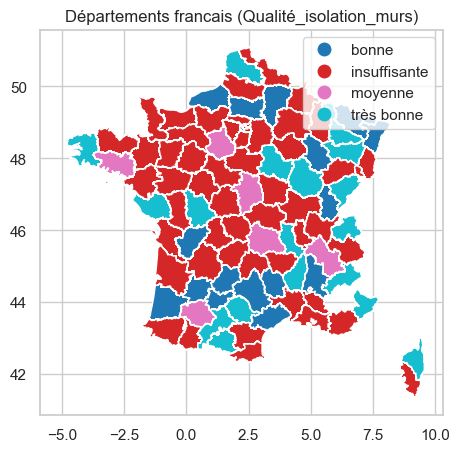

In [34]:
import geopandas as gpd
gdf_dep = gpd.GeoDataFrame(gdf_dep, geometry = 'geometry_x')

def Carte_France_departements (geodf,var):
    '''
    args => geodf est un geodataframe avec les polygone des régions en géométries 
         => var : le nom de la varaible d'intéret (numérique) ex : 'Qualité_isolation_murs' ou 'Conso_5_usages/m²_é_finale'
    '''
    geodf.plot(figsize = (7,5), column = var, legend = True)
    plt.title(f"Départements francais ({var})")

Carte_France_departements(gdf_dep,'Qualité_isolation_murs' )

-----------------------------
    => Etape 2 : on se focalise à présent que sur les logements de la région parisienne (Paris intramusros plus petite couronne)

In [35]:
import cartiflette.s3 as s3
#analyse et represenations cartographiques
shp_communes = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 8.12MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 5.98MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 7.26MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 6.64MiB/s]


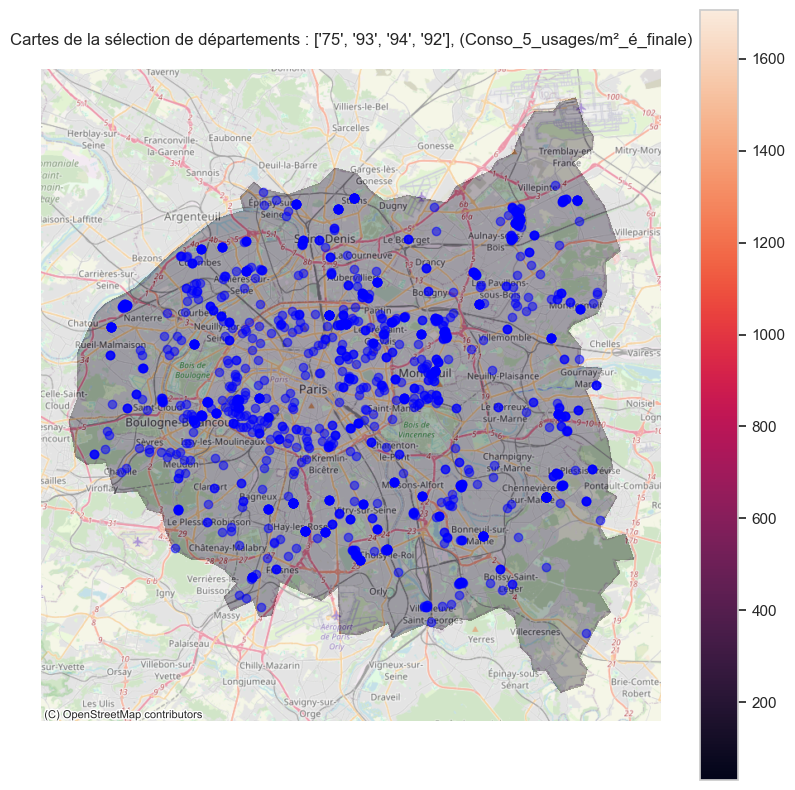

In [39]:
import contextily as ctx

def carte_selection_dep (gdf_dep, values, selected_var = 'Conso_5_usages/m²_é_finale') : 
    '''
    returne
    '''
    gdf_zone = gdf_dep[gdf_dep['code'].isin(values)]

    sorted(gdf_zone['code'].unique())
    fig, ax = plt.subplots ( figsize= (10,10))
    gdf_zone.to_crs(3857).plot(ax=ax, zorder=1 ,column = selected_var, legend = True, edgecolor = "black", linewidth=0.5)
    gdf_zone['geometry_y'].to_crs(3857).plot(ax =ax, color = 'blue',alpha = 0.5, zorder=3)

    #shp_communes.to_crs(3857).boundary.plot(ax=ax, zorder=1 , edgecolor = "black", linewidth=0.5, facecolor="none",color = None)
    ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik, zorder=2, alpha = 0.7)
    ax.set_axis_off()
    plt.title(f'Cartes de la sélection de départements : {values}, ({selected_var})' ) 

values = ['75','93','94','92']
carte_selection_dep (gdf_dep, values)

---------------------------------------
    => ETAPE 3 : REPRESENTATION DES REGIONS AVEC DECOUPAGE EN DEPARTEMENT

In [40]:
code_regions_france = pd.read_csv('DATA/code_region_france.csv', delimiter = ';')
code_regions_france['REG'] = code_regions_france['REG'].astype(str)

gdf = gdf.merge(code_regions_france, left_on='N°_région_(BAN)', right_on='REG')

In [41]:
gdf = deps.merge(gdf, left_on = 'code', right_on = 'N°_département_(BAN)')
gdf = gpd.GeoDataFrame(gdf, geometry = 'geometry_x')


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=09/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.10MiB [00:00, 17.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=48/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.02MiB [00:00, 16.1MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=81/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.25MiB [00:00, 6.85MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=82/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 871kiB [00:00, 6.50MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=11/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.29MiB [00:00, 14.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=30/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.14MiB [00:00, 21.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=65/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.32MiB [00:00, 11.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=66/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 920kiB [00:00, 13.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=12/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.76MiB [00:00, 11.8MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=31/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.61MiB [00:00, 15.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=32/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.52MiB [00:00, 12.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=34/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.38MiB [00:00, 15.8MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=46/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.26MiB [00:00, 13.4MiB/s]


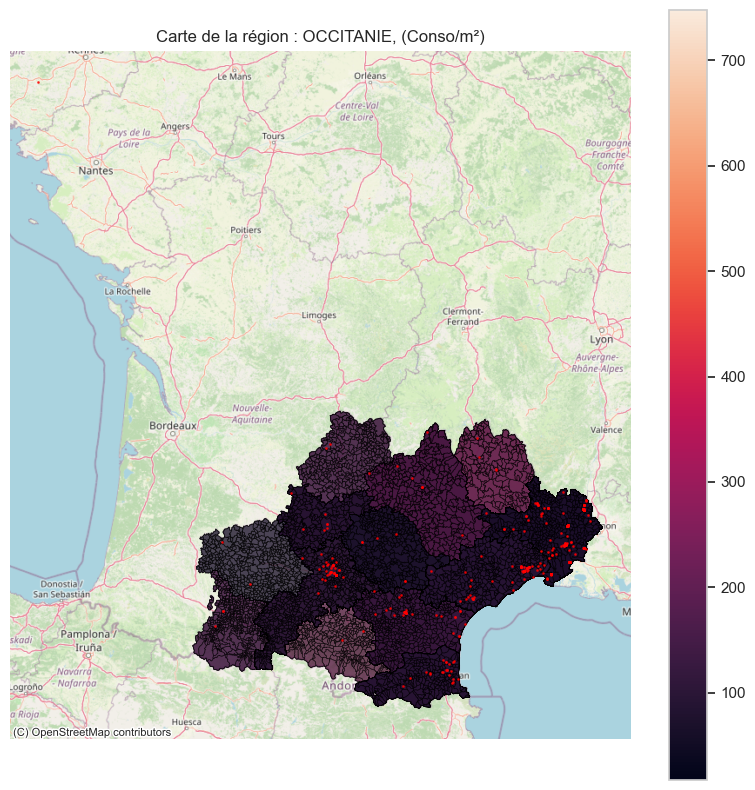

In [42]:
# L'objectif c'est de pouvoir faire une fonction qui nous affiche les logements selon la région que l'on indique : 
# 1° on indique la région : exemple (ile de france)
# 2° a partir de cette region on récupere la liste des département qui la compose ( .unique())
# 3° On plot les point et les tracé des département 
# 4° on plot une carte interactive. 
def carte_region (gdf, region_choisie, var='Conso_5_usages/m²_é_finale'):
    ''' /!\ le gdf doit contenir - les noms de regions
                                 - les numéros de département et leurs géométrie
    '''
    gdf_region = gdf[gdf['Nom_reg']== region_choisie]
    shp_communes = s3.download_vectorfile_url_all(
        crs = 4326,
        values = gdf_region['code'].unique(), #on obtiens tous les codes des département de la régions selectionnée
        borders="COMMUNE_ARRONDISSEMENT",
        vectorfile_format="topojson",
        filter_by="DEPARTEMENT",
        source="EXPRESS-COG-CARTO-TERRITOIRE",
        year=2022)

    #values = gdf['code'].unique()   on obtiens tous les codes des département de la régions selectionnée
    #gdf_paris = gdf_dep[gdf_dep['code'].isin(gdf['code'].unique())]

    #sorted(gdf_paris['code'].unique())
    #gdf_paris
    fig, ax = plt.subplots ( figsize= (10,10))
    gdf_region.to_crs(3857).plot(ax=ax ,column = 'Conso_5_usages/m²_é_finale', legend = True, edgecolor = "black", linewidth=0.5, zorder=2, alpha=0.5)
    gdf_region['geometry_y'].to_crs(3857).plot(ax =ax, marker='o', markersize=1, alpha=0.7,color = 'red', zorder=4)

    shp_communes.to_crs(3857).boundary.plot(ax=ax, zorder=3 , edgecolor = "black", linewidth=0.5, facecolor="none",color = None, alpha=0.5)
    ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik, zorder=1, alpha = 1)
    plt.title (f"Carte de la région : {region_choisie}, (Conso/m²)")
    ax.set_axis_off()

#test    
region_choisie = np.random.choice(gdf['Nom_reg'].unique())
carte_region(gdf, region_choisie)

----------------------------------------------------------------------------------------------------
    => Statitiques descriptives géographiques : 

In [43]:
Noms_regions = pd.read_csv("DATA/anciennes-nouvelles-regions.csv", delimiter=';')
Noms_regions['Nouveau Code'] = Noms_regions['Nouveau Code'].astype(str)
df_DPE = df_DPE.merge(Noms_regions, left_on = 'N°_région_(BAN)', right_on= 'Nouveau Code').drop('Nouveau Code',  axis=1)

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_806/1747082739.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_806/1747082739.py:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



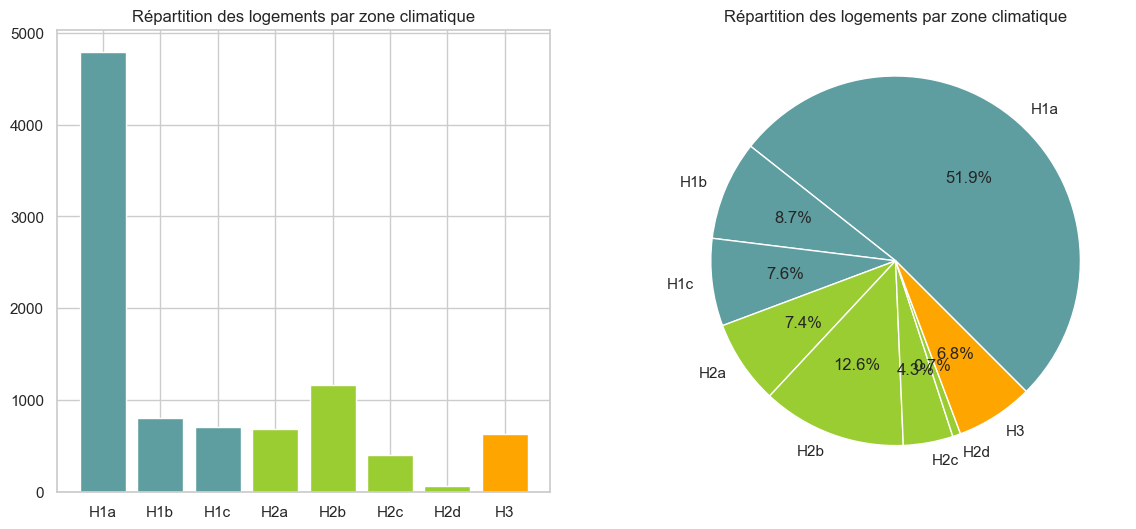

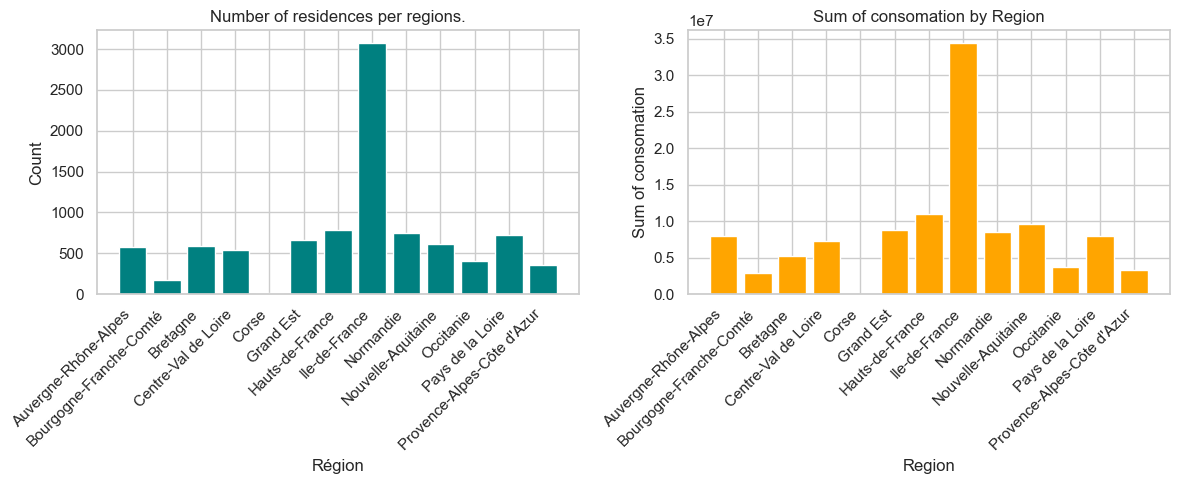

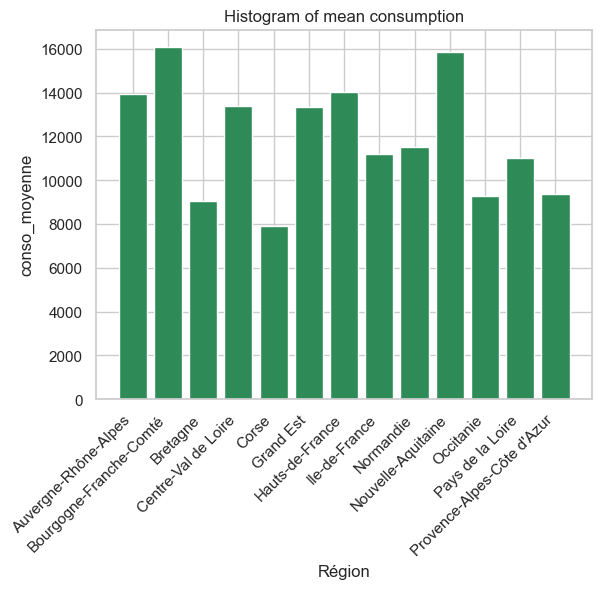

In [44]:
# DEBUT DES EXPLORATIONS - taches à effectuer : 

    ####### répartition des logemenst de la base pat zone climatique 
# Création de deux graphiques (en barre et circulaire)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

val = df_DPE['Zone_climatique_'].value_counts().sort_index()
colors= 3*['cadetblue'] + 4*['yellowgreen'] + ['orange']


axes[0].bar(val.index, val, color= colors)
axes[0].set_title('Répartition des logements par zone climatique')
explode = (0, 0, 0, 0, 0, 0, 0, 0)
axes[1].pie(x=val, labels=val.index, startangle=-45,colors=colors, autopct='%1.1f%%', explode = explode)
axes[1].set_title('Répartition des logements par zone climatique')


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    ####### Premier sous-graphique : Répartition des logements par région
val_region = df_DPE['Nouveau Nom'].value_counts().sort_index()
axs[0].bar(val_region.index, val_region, color='teal')
axs[0].set_xlabel('Région')
axs[0].set_ylabel('Count')
axs[0].set_title('Number of residences per regions.')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')


    ####### Deuxième sous-graphique : Classement des régions par consommation
comptage_conso_region = df_DPE.groupby('Nouveau Nom')['Conso_5_usages_é_finale'].sum()
axs[1].bar(comptage_conso_region.index, comptage_conso_region, color='orange')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Sum of consomation')
axs[1].set_title('Sum of consomation by Region')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45 , ha='right')
plt.tight_layout()
plt.show()

    ####### consomation moyen d'un logement par région : 
df_conso_regions = pd.merge(comptage_conso_region, val_region, on ='Nouveau Nom')
df_conso_regions['conso_moyenne'] = df_conso_regions['Conso_5_usages_é_finale']/df_conso_regions['count']
df_conso_regions

plt.bar(df_conso_regions.index, df_conso_regions['conso_moyenne'], color= 'seagreen')

plt.xlabel('Région')
plt.ylabel('conso_moyenne')
plt.xticks(rotation=45,ha='right')
plt.title('Histogram of mean consumption')
plt.show()    
    

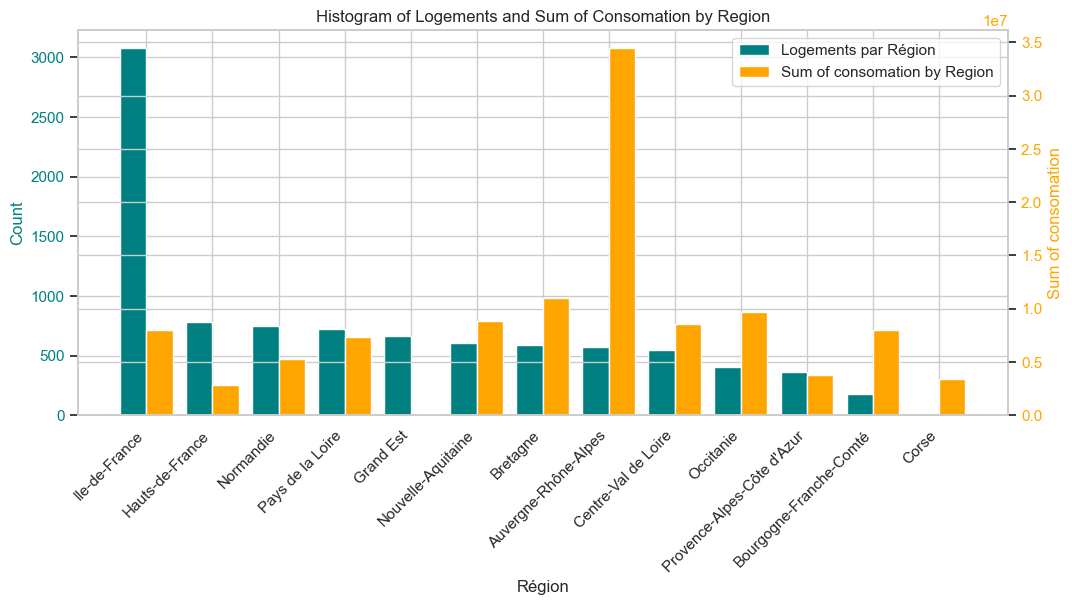

In [45]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5))
bar_width = 0.4

#Nombre de logements par région (axe des ordonnées à gauche)
val_region = df_DPE['Nouveau Nom'].value_counts()
bar_positions1 = np.arange(len(val_region))
ax1.bar(bar_positions1, val_region, width=bar_width, color='teal', label='Logements par Région')
ax1.set_xlabel('Région')
ax1.set_ylabel('Count', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_title('Histogram of Logements and Sum of Consomation by Region')

#deuxième axe des ordonnées (à droite)
ax2 = ax1.twinx()

#conso par région (axe des ordonnées à droite )
comptage_conso_region = df_DPE.groupby('Nouveau Nom')['Conso_5_usages_é_finale'].sum()
bar_positions2 = bar_positions1 + bar_width
ax2.bar(bar_positions2, comptage_conso_region, width=bar_width, color='orange', label='Sum of consomation by Region')
ax2.set_ylabel('Sum of consomation', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels() #légende
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

ax1.set_xticks(bar_positions1 + bar_width / 2)
ax1.set_xticklabels(val_region.index, rotation=45, ha='right')

plt.show()